In [42]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

In [2]:
data = pd.read_csv('data_ohe.csv')
y = pd.read_csv('data.csv').target
data.head()

,cylinders,age,odometer_km,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
0,8.0,41.0,93226.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,11.0,31697.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,3.0,43816.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.0,27.0,120572.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,16.0,124301.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1)

In [4]:
bc = BaggingClassifier()
bc.fit(X=X_train, y=y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [5]:
rfc = RandomForestClassifier()
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
lc = LogisticRegression()
lc.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
knc = KNeighborsClassifier()
knc.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
# Accuracy for BaggingClassifier
accuracy_score(y_test, bc.predict(X_test))

0.8730543883529621

In [9]:
# Accuracy for RandomForestClassifier
accuracy_score(y_test, rfc.predict(X_test))

0.8724033852163106

In [10]:
# Accuracy for Linear classifier
accuracy_score(y_test, lc.predict(X_test))

0.8092166262255627

In [11]:
# Accuracy for k Nearest Neighbors classifier
accuracy_score(y_test, knc.predict(X_test))

0.8308772760450573

In [29]:
# Create ensemble
mean_errors = (bc.predict_proba(X_test) + \
               rfc.predict_proba(X_test) + \
               lc.predict_proba(X_test) + \
               knc.predict_proba(X_test)) / 4

In [36]:
final_pred = [1 if i[1]>0.5 else 0 for i in mean_errors]
accuracy_score(y_test, final_pred)

0.8776771682021135

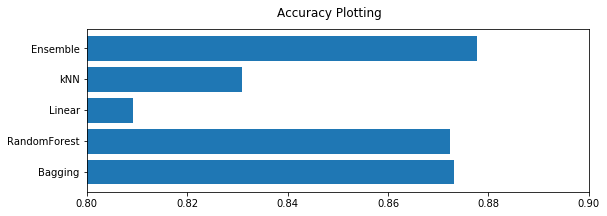

In [41]:
names = ['Bagging', 'RandomForest', 'Linear', 'kNN', 'Ensemble']
values = [accuracy_score(y_test, bc.predict(X_test)), accuracy_score(y_test, rfc.predict(X_test)),
          accuracy_score(y_test, lc.predict(X_test)), accuracy_score(y_test, knc.predict(X_test)),
          accuracy_score(y_test, final_pred)]

plt.figure(1, figsize=(9, 3))

plt.barh(names, values, )
plt.suptitle('Accuracy Plotting')
plt.xlim(0.8, 0.9)
plt.show()

Best model is Ensemble. The second, there is Bagging